<a href="https://colab.research.google.com/github/MirzaDanyalBaig/ML_OEL_PhonEzy/blob/master/ML_OEL_PhonEzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smartphone Prices Recommendation System

A solution for user's problems regarding the concern that whether the smartphones they've selected is within the range of optimal prices or not? PhonEzy let user provide some information regarding the phone of their choice and recommend them the optimal price for it.

# Contributors:
1.   Muhammad Faizan Khan (CS-21070)
2.   Mirza Danyal Baig (CS-21076)
3.   Aneeq Akhtar (CS-21101)



# Downloading Packages

In [293]:
# # Downloading all necessary packages
# !pip install Cython
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.2.2
# !pip install -U scikit-learn
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install category_encoders

# Importing Packages

In [294]:
# Importing required libraries and packages
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.exceptions import DataConversionWarning

# Ignore warnings from terminal.
warnings.filterwarnings(action='ignore')


# Loading Dataset

In [295]:
# Importing dataset
df = pd.read_csv('smartphonesDataset.csv')

In [296]:
# Show the dataset
df

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


# Data Cleaning

* ## Handling Missing Values

In [297]:
# Checking for missing values in dataset
df.isnull().sum()

# Missing values are present in the dataset in RAM and Storage columns

Smartphone      0
Brand           0
Model           0
RAM           483
Storage        25
Color           0
Free            0
Price           0
dtype: int64

There are several ways to fill missing values of the dataset including:
*   Imputation: Removal of rows with missing data.
*   Mode method: Take mode of data to fill missing records. Useful in filling missing continuous data values.
*   Mean method: Take mean of data to fill missing records. Useful in filling missing discrete data values.

Since RAM and storage columns are discrete numeric columns, thus we will fill them with mode technique.

In [298]:
# Filling missing values of RAM and Storage columns with mode of their respective data
df.fillna({'RAM': df['RAM'].mode()[0]} , inplace = True)
df.fillna({'Storage': df['Storage'].mode()[0]} , inplace = True)

In [299]:
# Checking for missing values again
df.isnull().sum()

Smartphone    0
Brand         0
Model         0
RAM           0
Storage       0
Color         0
Free          0
Price         0
dtype: int64

* ## Handling Duplicate Rows

Since duplication of records can lead to overfitting of data in model, thus we will remove it.

In [300]:
# Checking for duplicate rows
df.duplicated().sum()

# No duplicates rows are found in dataset

0

# Exploratory Data Analysis (EDA)

Now we will perform Exploratory Data Analysis (EDA) on dataset to gain insight regarding different patterns in data and compare different relationships between features of dataset.

In [301]:
# Show the shape of dataset

df.shape

(1816, 8)

In [302]:
# Show initial 5 rows of the dataset
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


* ## Summary of Dataset

In [303]:
# Show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Smartphone  1816 non-null   object 
 1   Brand       1816 non-null   object 
 2   Model       1816 non-null   object 
 3   RAM         1816 non-null   float64
 4   Storage     1816 non-null   float64
 5   Color       1816 non-null   object 
 6   Free        1816 non-null   object 
 7   Price       1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


Now we will show the statistical data summary of dataset.

In [304]:
# Show summary of the dataset
df.describe()

,RAM,Storage,Price
count,1816.000000,1816.000000,1816.000000
mean,6.503304,162.175110,492.175573
std,2.456899,138.507038,398.606183
min,1.000000,2.000000,60.460000
25%,4.000000,64.000000,200.990000
50%,8.000000,128.000000,349.990000
75%,8.000000,256.000000,652.717500
max,12.000000,1000.000000,2271.280000


* ## Seperating Categorical and Numeric Columns

Now we will separate the categorical and numeric coulmns of dataset to perform the respective type of data preprocessing correspondingly.

In [305]:
# For categorical columns
categorical_columns = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical_columns)))
print('The categorical variables are :\n\n', categorical_columns)

There are 5 categorical variables

The categorical variables are :

 ['Smartphone', 'Brand', 'Model', 'Color', 'Free']


In [306]:
# For numeric columns
numerical_columns = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical_columns)))
print('The numerical variables are :', numerical_columns)

There are 3 numerical variables

The numerical variables are : ['RAM', 'Storage', 'Price']


* ## Unique Values of Columns

Now we will represent the unique values of each column of dataset to determine whether the columns data has continuous or discrete data.

This will later help us during feature engineering.

1. ### For Smartphone Column

In [307]:
# Checking the unique values in Smartphone column.
print("Unique values in 'Smartphone' Column:")
print(df["Smartphone"].unique())

# Also printing its count.
print("\nCount of unique values in 'Smartphone' Column:")
df["Smartphone"].nunique()

Unique values in 'Smartphone' Column:
['Realme C55 8/256GB Sunshower Libre'
 'Samsung Galaxy M23 5G 4/128GB Azul Libre'
 'Motorola Moto G13 4/128GB Azul Lavanda Libre' ...
 'Xiaomi Redmi Note 9 4/128GB Blanco Libre'
 'Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre'
 'Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre']

Count of unique values in 'Smartphone' Column:


1816

Since the data in 'Smartphone' column has totally unique, continuous, categorical data, thus it will be dropped in feature engineering as it has no pattern for model to recognize.

2. ### Brand Column:

In [308]:
# Checking the unique values in Brand column.
print("Unique values in 'Brand' Column:")
print(df["Brand"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Brand"].nunique()

Unique values in 'Brand' Column:
['Realme' 'Samsung' 'Motorola' 'Xiaomi' 'Nothing' 'POCO' 'Apple' 'OPPO'
 'Alcatel' 'Vivo' 'ZTE' 'OnePlus' 'TCL' 'CAT' 'SPC' 'Cubot' 'Google'
 'Ulefone' 'Nokia' 'Honor' 'Huawei' 'Sony' 'Hammer' 'Qubo' 'Blackview'
 'Asus' 'Microsoft' 'BQ' 'Crosscall' 'Doro' 'Fairphone' 'Funker' 'Gigaset'
 'LG' 'Maxcom' 'Swissvoice' 'Lenovo']

Count of unique values in 'Brand' Column:


37

3. ### Model Column

In [309]:
# Checking the unique values in Brand column.
print("Unique values in 'Model' Column:")
print(df["Model"].unique())

# Also printing its count.
print("\nCount of unique values in 'Model' Column:")
df["Model"].nunique()

Unique values in 'Model' Column:
['C55' 'Galaxy M23' 'Moto G13' 'Redmi Note 11S' 'Phone (2)' 'Moto E32s'
 '9 Pro' 'Redmi Note 12' 'M4' 'C31' 'iPhone 14' 'Galaxy M13' 'Redmi 10C'
 'Narzo 50i' '11 Pro' 'X5 Pro' 'Redmi Note 11' 'C53' 'Moto E20'
 '10 AMOLED' 'Galaxy M53' 'Galaxy M33' '9' 'Moto G23' 'C33' 'Narzo 50A'
 'Redmi 9C' 'Redmi A1' 'Moto G32' 'X5' 'Moto G73' 'Galaxy A54' 'Redmi 12C'
 'Redmi 10A' 'GT2' 'C30' 'Moto E13' 'Edge 30' 'GT Neo 3' 'Galaxy A34'
 'C40' 'Note 12S' 'F5' 'Reno8' 'iPhone 12' '1 (2021)' 'GT Neo 3T'
 'iPhone 11' 'Galaxy Z Flip4' 'A17' 'Galaxy S22' '1B 2022' 'Galaxy S23'
 'M5s' '8I' '12T' 'Phone (1)' 'Redmi 12' 'Y22s' 'Galaxy A33' '13'
 'iPhone 13' 'Y35' 'X60 Pro' 'Edge 40' 'Blade A52' 'Galaxy S21' 'A78'
 'Galaxy A14' 'Galaxy A23' '12' 'Y76' 'M5' 'Narzo 50' 'A98' 'iPhone XR'
 'Y16' 'Redmi 10' 'Razr 40' 'Redmi 9A' 'Blade A72' 'Nord CE 3' 'A57s'
 '20 R' 'S42H+' 'Galaxy A53' 'V21 5G' 'Smart Ultimate' 'Nord CE 2'
 'KingKong Power' 'Reno10' 'iPhone 8' '408' '40 SE' '403' 

383

4. ### RAM Column

In [310]:
# Checking the unique values in RAM column.
print("Unique values in 'RAM' Column:")
print(df["RAM"].unique())

# Also printing its count.
print("\nCount of unique values in 'RAM' Column:")
df["RAM"].nunique()

Unique values in 'RAM' Column:
[ 8.  4.  6. 12.  3.  2.  1.]

Count of unique values in 'RAM' Column:


7

5. ### Storage Column

In [311]:
# Checking the unique values in Storage column.
print("Unique values in 'Storage' Column:")
print(df["Storage"].unique())

# Also printing its count.
print("\nCount of unique values in 'Storage' Column:")
df["Storage"].nunique()

Unique values in 'Storage' Column:
[ 256.  128.  512.   64.   32.   16.    2. 1000.    4.   12.    3.    8.]

Count of unique values in 'Storage' Column:


12

6. ### Color Column

In [312]:
# Checking the unique values in Color column.
print("Unique values in 'Color' Column:")
print(df["Color"].unique())

# Also printing its count.
print("\nCount of unique values in 'Color' Column:")
df["Color"].nunique()

Unique values in 'Color' Column:
['Yellow' 'Blue' 'Gray' 'White' 'Black' 'Green' 'Silver' 'Gold' 'Brown'
 'Orange' 'Purple' 'Pink' 'Red' 'Turquoise' 'Rainbow' 'Bronze' 'Crystal']

Count of unique values in 'Color' Column:


17

7. ### Free Column

In [313]:
# Checking the unique values in Free column.
print("Unique values in 'Free' Column:")
print(df["Free"].unique())

# Also printing its count.
print("\nCount of unique values in 'Free' Column:")
df["Free"].nunique()

Unique values in 'Free' Column:
['Yes' 'No']

Count of unique values in 'Free' Column:


2

8. ### Final Price Column

In [314]:
# Checking the unique values in Price column.
print("Unique values in 'Price' Column:")
print(df["Price"].unique())

# Also printing its count.
print("\nCount of unique values in 'Price' Column:")
df["Price"].nunique()

Unique values in 'Price' Column:
[231.6  279.   179.01 ... 229.92 271.   211.  ]

Count of unique values in 'Price' Column:


1022

Price column has continuous, numeric values.

 * ## Unique Value Count for Columns

Now we will calculate the count for individual unique value of every column in the data.

Smartphone column will be ignored since each value in column is unique value.

Price column will also be ignored due to having continuous numeric values.

1. ### Brand Column:

In [315]:
# Show count of each 'Brand' unique value in the dataset
brand_count = df['Brand'].value_counts()
brand_count

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64

2. ### Model Column:

In [316]:
# Show count of each 'Model' unique value in the dataset
model_count = df['Model'].value_counts()
model_count

Model
iPhone 13       60
iPhone 14       59
iPhone 12       54
Galaxy S23      53
11 Pro          46
                ..
Jasper 2         1
A53s             1
G21              1
A57              1
Pocophone F2     1
Name: count, Length: 383, dtype: int64

3. ### RAM Column:

In [317]:
# Show count of each 'RAM' unique value in the dataset
ram_count = df['RAM'].value_counts()
ram_count

RAM
8.0     864
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64

4. ### Storage Column:

In [318]:
# Show count of each 'Storage' unique value in the dataset
storage_count = df['Storage'].value_counts()
storage_count

Storage
128.0     757
256.0     412
64.0      332
32.0      166
512.0      94
16.0       24
1000.0     17
4.0         6
8.0         3
2.0         2
3.0         2
12.0        1
Name: count, dtype: int64

5. ### Color Column:

In [319]:
# Show count of each 'Color' unique value in the dataset
color_count = df['Color'].value_counts()
color_count

Color
Black        537
Blue         339
Gray         196
Green        180
White        170
Silver        86
Purple        80
Gold          68
Red           48
Pink          41
Orange        30
Yellow        24
Turquoise      5
Brown          4
Crystal        4
Bronze         3
Rainbow        1
Name: count, dtype: int64

6. ### Free Column:

In [320]:
# Show count of each 'Free' unique value in the dataset
free_count = df['Free'].value_counts()
free_count

Free
Yes    1772
No       44
Name: count, dtype: int64

* ## Bar Graphs for Columns

1. ### Brand Column:

In [321]:
# Calculate percentages of 'Brand' feature values
brand_percentage = (brand_count/ brand_count.sum()) * 100

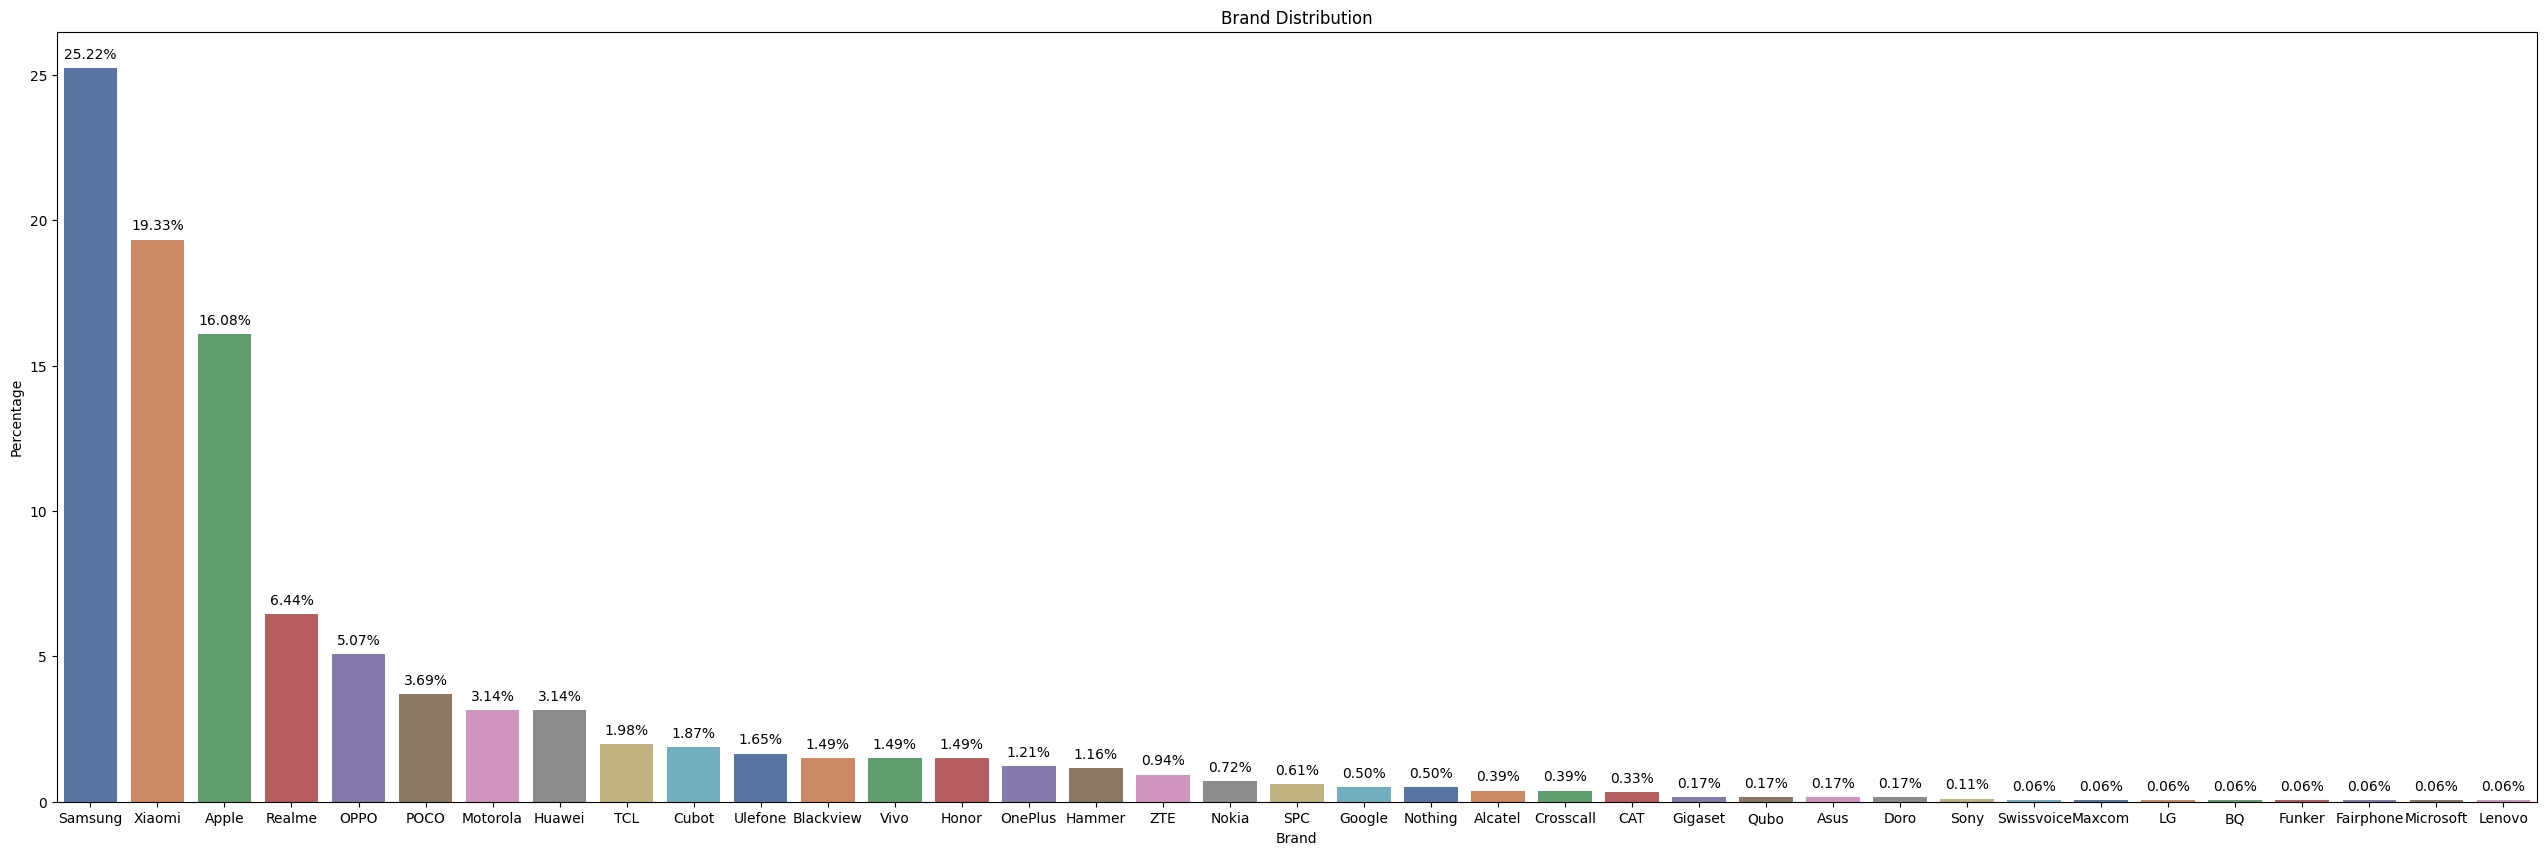

In [322]:
# Create the vertical bar plot of 'Brand' values distribution
plt.figure(figsize=(32, 10))
barplot = sns.barplot(x=brand_percentage.index, y=brand_percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Percentage")
plt.show()

2. ### RAM Column:

In [323]:
# Calculate percentages of 'RAM' feature values
ram_percentage = (ram_count / ram_count.sum()) * 100

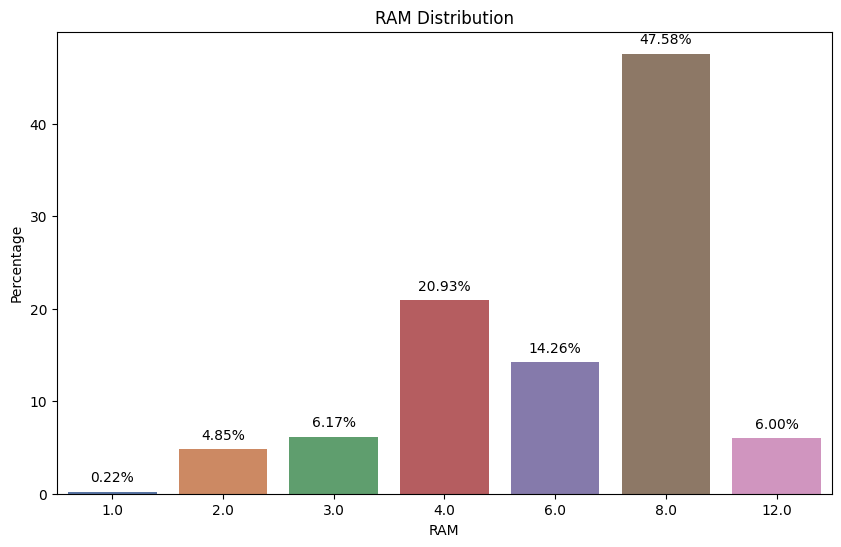

In [324]:
# Create the vertical bar plot of 'RAM' values distribution
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=ram_percentage.index, y=ram_percentage, palette='deep')
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("RAM Distribution")
plt.xlabel("RAM")
plt.ylabel("Percentage")
plt.show()

3. ### Storage Column:

In [325]:
# Calculate percentages of 'Storage' feature values
storage_percentage = (storage_count / storage_count.sum()) * 100

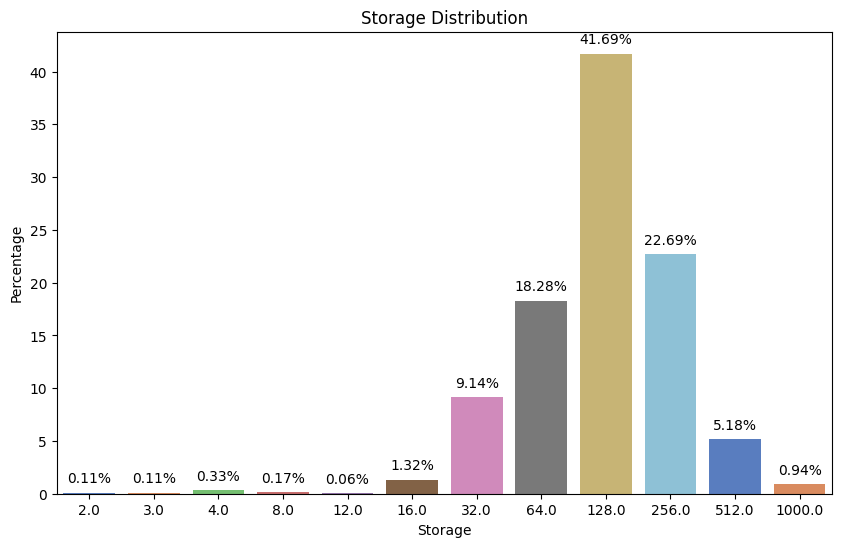

In [326]:
# Create the vertical bar plot of 'Storage' values distribution
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=storage_percentage.index, y=storage_percentage, palette='muted')
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("Storage Distribution")
plt.xlabel("Storage")
plt.ylabel("Percentage")
plt.show()

4. ### Color Column:

In [327]:
# Calculate percentages of 'Color' feature values
color_percentage = (color_count/ color_count.sum()) * 100

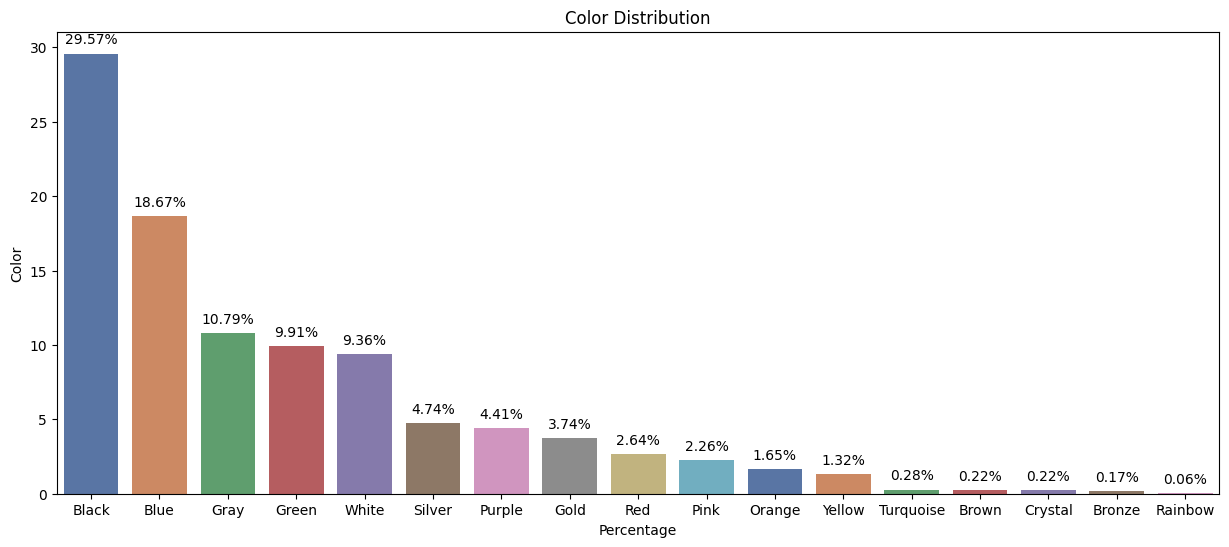

In [328]:
# Create the vertical bar plot of 'Color' values distribution
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=color_percentage.index, y=color_percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.xlabel('Percentage')
plt.ylabel("Color")
plt.title('Color Distribution')
plt.show()

5. ### Free Column:

In [329]:
# Calculate percentages of 'Color' feature values
free_percentage = (free_count/ free_count.sum()) * 100

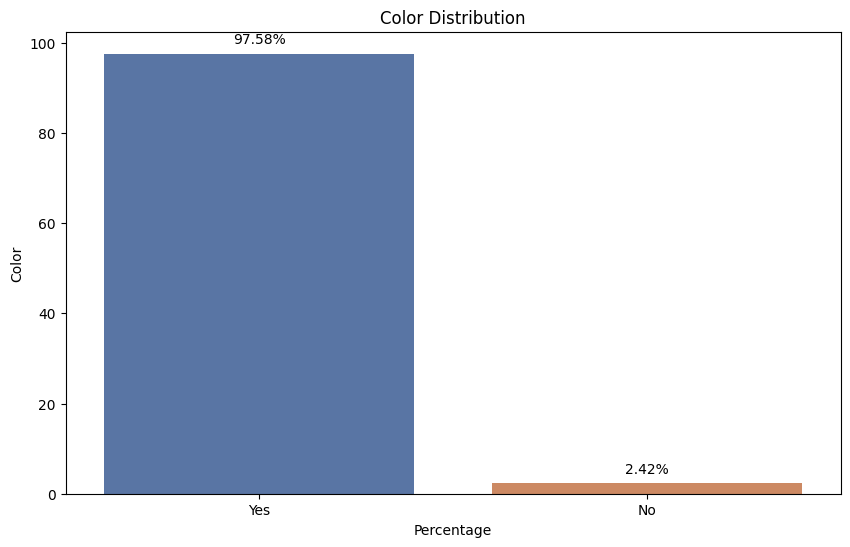

In [330]:
# Create the vertical bar plot of 'Color' values distribution
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=free_percentage.index, y=free_percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.xlabel('Percentage')
plt.ylabel("Color")
plt.title('Color Distribution')
plt.show()

# Feature Engineering

Feature Engineering is heavily dependent upon the type of features that will be used to train model and thus, can greatly effect model efficiency.

In [331]:
# Check the original dataset
df.head(10)

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
5,Motorola Moto E32s 4/64GB Gris Libre,Motorola,Moto E32s,4.0,64.0,Gray,Yes,148.52
6,Nothing Phone (2) 12/256GB Blanco Libre,Nothing,Phone (2),12.0,256.0,White,Yes,699.00
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128.0,Black,Yes,352.59
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,Samsung,Galaxy M23,4.0,128.0,Green,Yes,279.00
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,Xiaomi,Redmi Note 12,8.0,256.0,Gray,Yes,329.99


* ## Dataset Encoding

Smartphone column will not be used as feature due to totally unique categorical values, thus no need for encoding.

Similarly, since Price column contains continuous numeric data, thus, instead of encoding, we will scale and normalize it to improve model efficiency.

There are various encoding techniques to encode categorical data. Those which we will use are:
1.   FrequencyEncoding: Encode values based on the frequency of each category. This approach assigns a unique integer to each category based on how often it appears. We will use it to encode these columns:
    *   Brand
    *   Model
    *   Color
2.   LabelEncoding: This assign value to each unique category in the column. We will use it encode these columns:
    *   Free
3.   Normalization Scaling: Used to normalize the numeric values so as to equalize their effect on weights. We will use it encode these columns:
    *   RAM
    *   Storage
    *   Price

In [332]:
# Frequency Encoding function
def frequency_encoding(column):
    freq_encoding = df[column].value_counts() / len(df)
    df[f'{column}'] = df[column].map(freq_encoding)

In [333]:
# Drop Smartphone variable from dataset
df = df.drop('Smartphone', axis=1)

# Show initial 10 rows of dataset
df.head(10)

,Brand,Model,RAM,Storage,Color,Free,Price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
5,Motorola,Moto E32s,4.0,64.0,Gray,Yes,148.52
6,Nothing,Phone (2),12.0,256.0,White,Yes,699.00
7,Realme,9 Pro,8.0,128.0,Black,Yes,352.59
8,Samsung,Galaxy M23,4.0,128.0,Green,Yes,279.00
9,Xiaomi,Redmi Note 12,8.0,256.0,Gray,Yes,329.99


In [334]:
# Apply Frequency Encoding to categorical features (Brand, Model, Color)
frequency_encoding('Brand')
frequency_encoding('Model')
frequency_encoding('Color')

# Show initial 10 rows of dataset
df.head(10)

,Brand,Model,RAM,Storage,Color,Free,Price
0,0.064427,0.001652,8.0,256.0,0.013216,Yes,231.60
1,0.252203,0.002203,4.0,128.0,0.186674,Yes,279.00
2,0.031388,0.001101,4.0,128.0,0.186674,Yes,179.01
3,0.193282,0.003304,6.0,128.0,0.107930,Yes,279.99
4,0.004956,0.002203,12.0,512.0,0.093612,Yes,799.00
5,0.031388,0.000551,4.0,64.0,0.107930,Yes,148.52
6,0.004956,0.002203,12.0,256.0,0.093612,Yes,699.00
7,0.064427,0.007709,8.0,128.0,0.295705,Yes,352.59
8,0.252203,0.002203,4.0,128.0,0.099119,Yes,279.00
9,0.193282,0.020374,8.0,256.0,0.107930,Yes,329.99


In [335]:
# Apply Label Encoding to binary features (Free)
label_encoder = LabelEncoder()
df['Free'] = label_encoder.fit_transform(df['Free'])

# Show initial 10 rows of dataset
df.head(10)

,Brand,Model,RAM,Storage,Color,Free,Price
0,0.064427,0.001652,8.0,256.0,0.013216,1,231.60
1,0.252203,0.002203,4.0,128.0,0.186674,1,279.00
2,0.031388,0.001101,4.0,128.0,0.186674,1,179.01
3,0.193282,0.003304,6.0,128.0,0.107930,1,279.99
4,0.004956,0.002203,12.0,512.0,0.093612,1,799.00
5,0.031388,0.000551,4.0,64.0,0.107930,1,148.52
6,0.004956,0.002203,12.0,256.0,0.093612,1,699.00
7,0.064427,0.007709,8.0,128.0,0.295705,1,352.59
8,0.252203,0.002203,4.0,128.0,0.099119,1,279.00
9,0.193282,0.020374,8.0,256.0,0.107930,1,329.99


In [336]:
# Apply Normalization scaling to numeric features (RAM, Storage, Price)
scaler = MinMaxScaler(feature_range=(0, 1))
df[['RAM', 'Storage', 'Price']] = scaler.fit_transform(df[['RAM', 'Storage', 'Price']])

# Show initial 10 rows of dataset
df.head(10)

,Brand,Model,RAM,Storage,Color,Free,Price
0,0.064427,0.001652,0.636364,0.254509,0.013216,1,0.077410
1,0.252203,0.002203,0.272727,0.126253,0.186674,1,0.098850
2,0.031388,0.001101,0.272727,0.126253,0.186674,1,0.053623
3,0.193282,0.003304,0.454545,0.126253,0.107930,1,0.099298
4,0.004956,0.002203,1.000000,0.511022,0.093612,1,0.334057
5,0.031388,0.000551,0.272727,0.062124,0.107930,1,0.039831
6,0.004956,0.002203,1.000000,0.254509,0.093612,1,0.288825
7,0.064427,0.007709,0.636364,0.126253,0.295705,1,0.132136
8,0.252203,0.002203,0.272727,0.126253,0.099119,1,0.098850
9,0.193282,0.020374,0.636364,0.254509,0.107930,1,0.121914


* ## Correlation Matrix

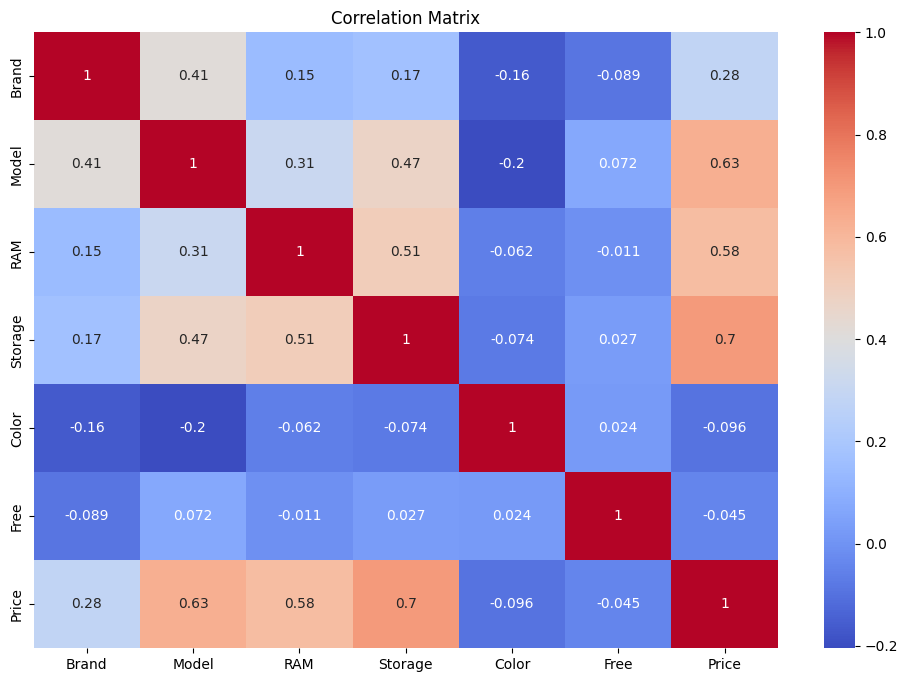

In [337]:
# Generate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* ## Distribution of Dataset into Features and Targets

In [338]:
# Separate Feature variables
X = df.drop(columns=['Price'])

# Separate Target variable
y = pd.DataFrame(df['Price'])
y.columns = ['Price']

In [339]:
# Show Feature dataset
X

,Brand,Model,RAM,Storage,Color,Free
0,0.064427,0.001652,0.636364,0.254509,0.013216,1
1,0.252203,0.002203,0.272727,0.126253,0.186674,1
2,0.031388,0.001101,0.272727,0.126253,0.186674,1
3,0.193282,0.003304,0.454545,0.126253,0.107930,1
4,0.004956,0.002203,1.000000,0.511022,0.093612,1
...,...,...,...,...,...,...
1811,0.193282,0.002753,0.272727,0.062124,0.186674,1
1812,0.193282,0.001652,0.272727,0.126253,0.186674,1
1813,0.193282,0.002753,0.272727,0.126253,0.093612,1
1814,0.193282,0.001652,0.272727,0.062124,0.107930,1


In [340]:
# Show Target dataset
y

,Price
0,0.077410
1,0.098850
2,0.053623
3,0.099298
4,0.334057
...,...
1811,0.085285
1812,0.063117
1813,0.094327
1814,0.068092


* ## Performance Evaluation Metric Function (For Python Packages Only)

In [341]:
def perforamce_eval_func(name, model, X_train, y_train, X_test, y_test):
  # Print the name of Model
  print(name)

  # Evaluate performance
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Example of K-Fold Cross-Validation
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
  avg_mse_cv = -np.mean(scores)  # Taking the mean of negative MSE scores

  # Print results
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"R^2 Score: {r2}")
  print(f"Average Cross-Validated Mean Squared Error (MSE): {avg_mse_cv}")
  print()

  # Actual vs. Predicted Plot
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs. Predicted Values')
  plt.show()

# Model Building Using Python Package

*   ## Linear Regression

In [342]:
# Iterate thousand times to find best Random State for greatest R^2 score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train,y_train)
    y_pred = linear_regression.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [343]:
# Find the state with max max R^2 score
max_score_state = np.argmax(scores)

# Show max score state
max_score_state

338

In [344]:
# Split training and testing data based on max score Random State
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=max_score_state)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred = linear_regression.predict(X_test)

* ## Performance Metric Evaluation

Linear Regression
Mean Squared Error (MSE): 0.008437003916014974
Mean Absolute Error (MAE): 0.0663410499747325
Root Mean Squared Error (RMSE): 0.09185316497549213
R^2 Score: 0.7721088094117179
Average Cross-Validated Mean Squared Error (MSE): 0.011078044072884118



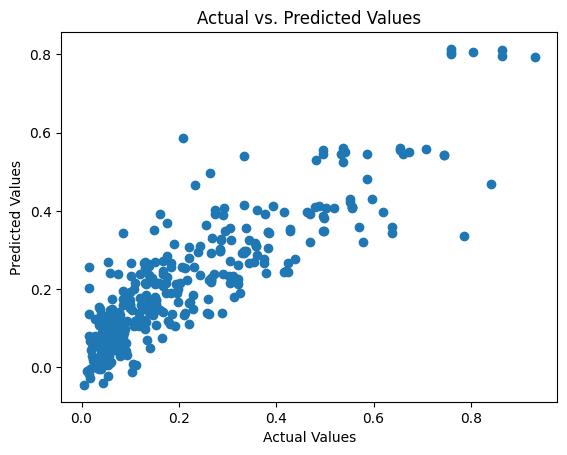

In [345]:
# Show performance evaluation metrics
perforamce_eval_func('Linear Regression', linear_regression, X_train, y_train, X_test, y_test)

It can deduced that model is underfitted onto the data due to frequency encoding which causes normalized values to occur on lesser spectrum of feature range.

# Model Building Without Using Python Package

* ## Linear Regression

In [346]:
# Implementing Custom Linear Regression Model
class CustomLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add bias term
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute parameters using closed-form solution (normal equation)
        theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        # Add bias term
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]

        return X_bias.dot(np.concatenate([[self.intercept_], self.coef_]))

# Applying the model on training data
model = CustomLinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

* ## Performance Metrics Evaluation

Custom Linear Regression:
Mean Squared Error (MSE): 0.008437003916015007
Mean Absolute Error (MAE): 0.06634104997473254
Root Mean Squared Error (RMSE): 0.09185316497549231
R^2 Score: 0.772108809411717


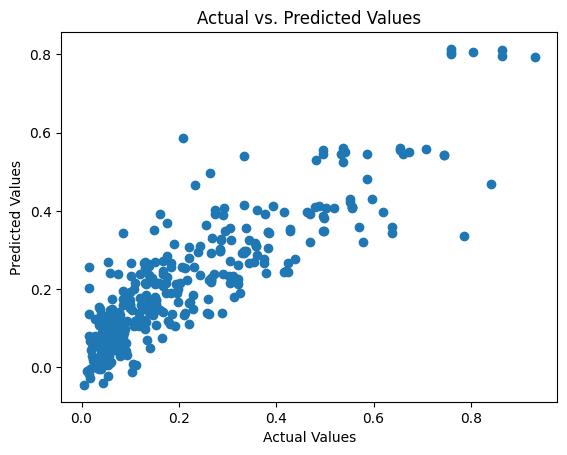

In [347]:
print(f"Custom Linear Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Actual vs. Predicted Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

By seeing the scatter plot, it can be deduced that scatter plots of Python Package Linear Regression and Custom Linear Regression is same, which suggests that model is fitted on the data at its best capacity i.e. this is the max efficiency that can be achieved using Linear Regression on given encoded data.

# Conclusion
